In [1]:
#dep: https://www.colour-science.org/installation-guide/

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

import pandas as pd
import colour
from colour.plotting import *
%matplotlib inline

In [2]:
%matplotlib inline

Let's start by initializing some constants for our material, and using them to create a reflectivity distribution based on material thickness.

Text(0, 0.5, 'Color Coordinates')

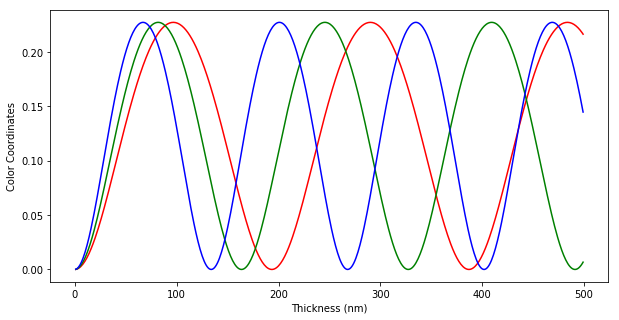

In [3]:
n = 1.68; #Index of refraction for mx12160
L = 3.1; #Thickness of a single mx12160 layer in nm
Lr = 650; #wavelength in nm for red light
Lg = 550; #wavelength in nm for green light
Lb = 450; #wavelength in nm for blue light
cosT = 1; #cosine of the internal angle of reflection; 0 degrees for our setup

h = np.array([]); #Range of possible thicknesses
rang = 500; #range of possible thicknesses, to restrict false positives
for x in range(1,rang):
    h = np.append(h,x)

r0 = (n-1)/(n+1);
Br = (4*(math.pi)*n*h)/Lr; #Beta for the red spectrum, with h factored out
Bg = (4*(math.pi)*n*h)/Lg; #Beta for the green spectrum, with h factored out
Bb = (4*(math.pi)*n*h)/Lb; #Beta for the blue spectrum, with h factored out

BHr = np.array([Br,h]) 
BHr = np.transpose(BHr) #List of beta values for varying values of thickness, h, for red spectrum

BHg = np.array([Bg,h])
BHg = np.transpose(BHg)#List of beta values for varying values of thickness, h, for green spectrum

BHb = np.array([Bb,h])
BHb = np.transpose(BHb)#List of beta values for varying values of thickness, h, for blue spectrum

Rr = 2*(1-np.cos(Br))/(np.power(r0,2)+np.power(r0,-2)-2*np.cos(Br))
#RHr = np.array([Rr,h])
#RHr = np.transpose(RHr)

Rg = 2*(1-np.cos(Bg))/(np.power(r0,2)+np.power(r0,-2)-2*np.cos(Bg))

Rb = 2*(1-np.cos(Bb))/(np.power(r0,2)+np.power(r0,-2)-2*np.cos(Bb))

#mpl.pyplot.plot(BHr)
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(h, Rr, color='red')
ax.plot(h, Rg, color='green')
ax.plot(h, Rb, color='blue')
ax.set_xlabel('Thickness (nm)')
ax.set_ylabel('Color Coordinates')

Text(0, 0.5, 'Normalized Color Coordinates')

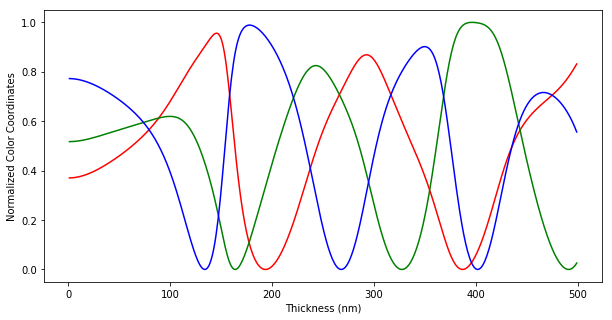

In [4]:
#This normalizes the functions by removing the intensity from the equation, simplifying to pure RGB data
norm = np.sqrt(np.power(Rr,2)+np.power(Rg,2)+np.power(Rb,2))
NRr = Rr/norm
NRg = Rg/norm
NRb = Rb/norm

fig,ax = plt.subplots(figsize = (10,5))
ax.plot(h, NRr, color='red')
ax.plot(h, NRg, color='green')
ax.plot(h, NRb, color='blue')
ax.set_xlabel('Thickness (nm)')
ax.set_ylabel('Normalized Color Coordinates')

Generate our own michele-levy chart, to demonstrate the power of colour

In [5]:
def mlEQ(lam, ret):
    '''
    lam: wavelength in nm
    ret: retardence in microns
    '''
    return np.sin(np.pi*ret/lam*10**3)**2. #ml equation


In [6]:
lamL = np.arange(360,830,1) #visiable light range 
retL = np.arange(0.4, 0.8, .001) #generate range of rets
I = np.array([[mlEQ(l,r) for l in lamL] for r in retL])
I_indx = np.array([[(l,r) for l in lamL] for r in retL])

In [7]:
I_indx;
# [[I(lam1, r1), I(lam2, r1), ... I(lamN, r1)],
#  [I(lam1, r2), ..., I(lamN, r2)]...]
#This generates list, so for each retardence (row), we find the intensity at each wavelength (cols)


In [8]:
#Convert to linear colour space (CIE XYZ), assuming a 'standard' spectral weighting
XYZ = [colour.sd_to_XYZ(colour.SpectralDistribution({
    lam:i for (lam,i) in zip(lamL,iL)}),illuminant=colour.ILLUMINANTS_RELATIVE_SPDS["D65"]) for iL in I]       

In [9]:
#Now, we can convert to rgb for displaying
sRGB = [list(colour.XYZ_to_sRGB(xyz/100)) for xyz in XYZ] 

In [10]:
mlChart = np.array([[i for i in sRGB] for j in np.arange(0,200)])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


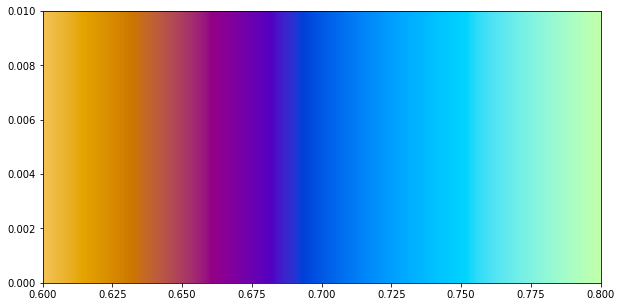

In [11]:
fig,ax = plt.subplots(figsize= (10,5))
#ax.axis('off')
ax.imshow(mlChart, extent= (0.6,.8,0,.01), aspect='auto')

In [12]:
#It's not perfect, but this is the basic ML chart. We could improve this by choosing a more 
#appropriate spectral illumination source (changing the D65 value)


## Determining the reflectivity of a film based on color data

In [13]:
im = plt.imread('mx12160_1point7PercentSilicone_30C_afterSettling.jpg')
#im = plt.imread('mx12160_1point1PercentBa6Fe_islandFormationCooling_44C_afterV2_img2.jpg')
#im = plt.imread('img2.tif')

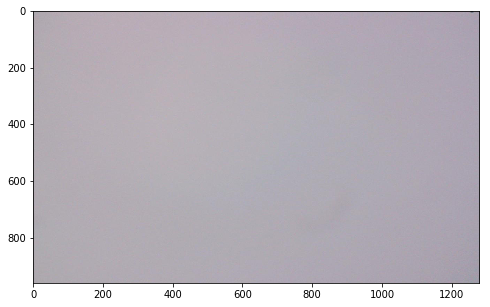

In [14]:
img,rx = plt.subplots(figsize = (8,5))
rx.imshow(im, aspect='auto', cmap='gray')


In [15]:
island_coords = [(742,292),(667,819), (530,824), (279,493), (729,969)]
island_px = [im[i_cord] for i_cord in island_coords]

In [16]:
island_px #these are in rgb values, need to convert to linear colour space

[array([177, 172, 178], dtype=uint8),
 array([174, 171, 182], dtype=uint8),
 array([172, 170, 181], dtype=uint8),
 array([182, 175, 182], dtype=uint8),
 array([169, 166, 177], dtype=uint8)]

In [17]:
island_xyz = [colour.sRGB_to_XYZ(col/255) for col in island_px]

In [18]:
island_xyz


[array([ 0.40919867,  0.42066512,  0.4808242 ]),
 array([ 0.40461966,  0.4150189 ,  0.5013406 ]),
 array([ 0.39728473,  0.40856303,  0.49508201]),
 array([ 0.43064873,  0.43982427,  0.50475663]),
 array([ 0.37934216,  0.38881777,  0.47100558])]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


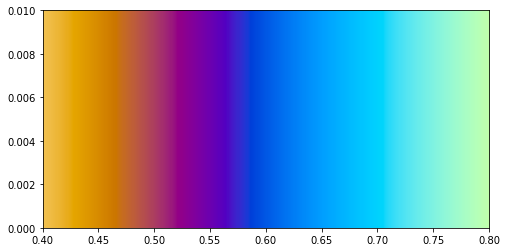

In [19]:
pig,ap = plt.subplots(figsize= (8,4))
#ax.axis('off')
ap.imshow(mlChart, extent= (.4,.8,0,.01), aspect='auto')

Now that we have the color coordinates of our image, let's try and fit it to the graph for reflectivity we found earlier! To do this, we first need a map that goes from color data to reflectivity; we can do this using the black glass images we took, which have a known reflectivity of 0.04. 

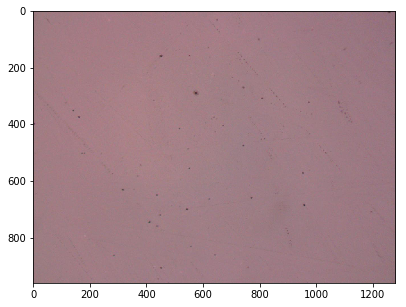

In [20]:
BGR = .04
blackGlass = plt.imread('BLACK_GLASS_9-1-2020_20X_28POINT875MS-EXPOSURE.jpg')
fig,ax=plt.subplots(figsize=(10,5))
ax.imshow(blackGlass)

In [21]:
bg_coord=(688,575)
bg_clear = blackGlass[bg_coord]
#bg_norm = np.sqrt(np.power(bg_clear[0],2)+np.power(bg_clear[1],2)+np.power(bg_clear[2],2))
#bg = bg_clear/bg_norm

redSlope = BGR/bg_clear[0] #This multiplied by a red coordinate in RGB space gives the red reflectivity
greenSlope = BGR/bg_clear[1]#This multiplied by a green coordinate in RGB space gives the green reflectivity
blueSlope = BGR/bg_clear[2]#This multiplied by a blue coordinate in RGB space gives the blue reflectivity

slopes = [redSlope, greenSlope, blueSlope]
#slopes = [1,1,1]

In [22]:
island_1 = island_px[0]
island_2 = island_px[1]
island_3 = island_px[2]

refl1 = slopes*island_1
refl2 = slopes*island_2
refl3 = slopes*island_3

norm1 = np.sqrt(np.power(refl1[0],2)+np.power(refl1[1],2)+np.power(refl1[2],2))
norm2 = np.sqrt(np.power(refl2[0],2)+np.power(refl2[1],2)+np.power(refl2[2],2))
norm3 = np.sqrt(np.power(refl3[0],2)+np.power(refl3[1],2)+np.power(refl3[2],2))

normd1 = refl1/norm1
normd2 = refl2/norm2
normd3 = refl3/norm3



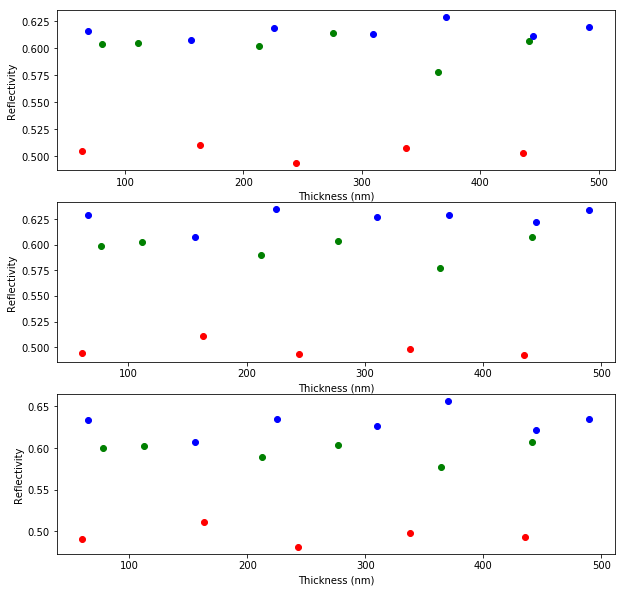

In [23]:
fig2,[ax1,ax2,ax3]= plt.subplots(nrows=3,ncols=1, figsize = (10,10))

id1R = np.argwhere(np.diff(np.sign(NRr - np.ones(rang-1)*normd1[0]))).flatten()
id1G = np.argwhere(np.diff(np.sign(NRg - np.ones(rang-1)*normd1[1]))).flatten()
id1B = np.argwhere(np.diff(np.sign(NRb - np.ones(rang-1)*normd1[2]))).flatten()
ax1.plot(h[id1R], NRr[id1R], 'ro')
ax1.plot(h[id1G], NRg[id1G], 'go')
ax1.plot(h[id1B], NRb[id1B], 'bo')
ax1.set_xlabel('Thickness (nm)')
ax1.set_ylabel('Reflectivity')


isl1RInters = [h[id1R], NRr[id1R]]
isl1GInters = [h[id1G], NRr[id1G]]
isl1BInters = [h[id1B], NRr[id1B]]

id2R = np.argwhere(np.diff(np.sign(NRr - np.ones(rang-1)*normd2[0]))).flatten()
id2G = np.argwhere(np.diff(np.sign(NRg - np.ones(rang-1)*normd2[1]))).flatten()
id2B = np.argwhere(np.diff(np.sign(NRb - np.ones(rang-1)*normd2[2]))).flatten()
ax2.plot(h[id2R], NRr[id2R], 'ro')
ax2.plot(h[id2G], NRg[id2G], 'go')
ax2.plot(h[id2B], NRb[id2B], 'bo')
ax2.set_xlabel('Thickness (nm)')
ax2.set_ylabel('Reflectivity')

isl2RInters = [h[id2R], NRr[id2R]]
isl2GInters = [h[id2G], NRr[id2G]]
isl2BInters = [h[id2B], NRr[id2B]]

id3R = np.argwhere(np.diff(np.sign(NRr - np.ones(rang-1)*normd3[0]))).flatten()
id3G = np.argwhere(np.diff(np.sign(NRg - np.ones(rang-1)*normd3[1]))).flatten()
id3B = np.argwhere(np.diff(np.sign(NRb - np.ones(rang-1)*normd3[2]))).flatten()
ax3.plot(h[id3R], NRr[id3R], 'ro')
ax3.plot(h[id3G], NRg[id3G], 'go')
ax3.plot(h[id3B], NRb[id3B], 'bo')
ax3.set_xlabel('Thickness (nm)')
ax3.set_ylabel('Reflectivity')

isl3RInters = [h[id3R], NRr[id3R]]
isl3GInters = [h[id3G], NRr[id3G]]
isl3BInters = [h[id3B], NRr[id3B]]

In [24]:
#This allows us to convert from base 10 to base 8, where the first digit is i, the second is j
DIGITS = '0123456789abcdef'
def convert_to_base(decimal_number, base):
    remainder_stack = []

    while decimal_number > 0:
        remainder = decimal_number % base
        remainder_stack.append(remainder)
        decimal_number = decimal_number // base

    new_digits = []
    while remainder_stack:
        new_digits.append(DIGITS[remainder_stack.pop()])
    
    if len(new_digits) <= 1:
        new_digits.append(0)
        new_digits.append(0)

    return new_digits
    #return ''.join(new_digits)

points1R = []
points1G = []
points1B = []

print(isl1RInters[0], isl1GInters[0])

R1xs = isl1RInters[0]
G1xs = isl1GInters[0]
B1xs = isl1BInters[0]

for i in (0, len (R1xs) - 1):
    for j in (0, len (G1xs) - 1):
        point = np.abs(R1xs[i]-G1xs[j])
        points1R.append(point)

mindif1r = np.amin(points1R)
posh1r = points1R.index(mindif1r)
print(mindif1r, posh1r, len(G1xs))

print(convert_to_base(posh1r,len(R1xs)))

poshi = int(convert_to_base(posh1r,len(R1xs))[0])
poshj = int(convert_to_base(posh1r,len(G1xs))[1])
print("i:",poshi, "j:",poshj)
print(R1xs[poshj],G1xs[poshj])

[  64.  163.  244.  337.  436.] [  81.  111.  213.  276.  364.  441.]
5.0 3 6
['3', 0, 0]
i: 3 j: 0
64.0 81.0


In [27]:
if np.abs(R1xs[poshj]-G1xs[poshj]) <= 15:
    avgThick = (R1xs[poshj]+G1xs[poshj])/2
    print(avgThick, "nm, ", int(avgThick/L), "layers")
else:
    print("Significant variation in thickness. Possible thicknesses are:")
    print(R1xs[poshj], "nm, ", int(R1xs[poshj]/L), "layers")
    print(G1xs[poshj], "nm, ", int(G1xs[poshj]/L), "layers")

Significant variation in thickness. Possible thicknesses are:
64.0 nm,  20 layers
81.0 nm,  26 layers


## Summary
Basically, this program works using the method laid down in Hiroshi's paper on determining film thickness from color distribution data. It operates by using the material properties to calculate a reflectivity spread for the red, blue, and green spectra and normalizes it to remove overall film brightness from consideration, then looks for solutions to the this system of equations that matches the reflectivities of the film. 

The reflectivities of the film are determined using a baseline image of a piece of black glass, which has a known reflectivity of 4%; this image can be split into it's three color channels (RGB) and this gives us a linear mapping for each color channel of the brightness to the reflectivity in that color range. This can be applied to the raw color data taken from an image of a film, giving us the absolute reflectivities; by normalizing each of these in the same method as above, we get three constant reflectivities which can be imposed on top of our reflectivity spread. The intersection points of these lines with the reflectivity spreads are then plotted. 

Each triplet of red, green, and blue points is then considered, and the triplet with the smallest total distance between them is considered the solution to the system. Each of these data points then has it's x-axis data extracted, giving 3 different thickness measurements. If all of these are equal to within 10nm, then only one of the values is reported and this is considered the thickness of the film. If they differ by a significant amount, then a message will appear saying that there is a significant variation in thickness, and all possible thickness values will be reported. By looking at the plot of intersection points, it should be clear which is the true thickness of the film. 